In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from statsmodels.sandbox.stats.runs import runstest_1samp
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import acf
from sklearn.decomposition import PCA

import qda

In [58]:

def summary_gaussianity(data_points,titolo=""):
	#plt.figure(figsize=(12,4))
	#plt.subplot(1, 3, 1)
	#stats.probplot(data_points,plot=plt)
	#plt.subplot(1, 3, 2)
	#plt.hist(data_points)
	#plt.subplot(1, 3, 3)
	#plt.plot(data_points,'o-')
	#plt.suptitle(f"{titolo}")
	#plt.show()
	shapiro_stat, shapiro_pvalue = stats.shapiro(data_points)
	print(f"({titolo}) P-value of normality: {shapiro_pvalue} - normality (alpha 5%)? {shapiro_pvalue>0.05}")


In [3]:
# Helper Function
# Run this section but dont expand it.\
#Anyway it gives the plot_object(pid) function.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from statsmodels.sandbox.stats.runs import runstest_1samp
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import acf

import os
import re
from scipy import ndimage
import math
import random
import cv2
import skimage
from scipy import stats
import pylab

from PIL import Image, ImageEnhance
from skimage.measure import label, regionprops
from skimage.io import imsave
from sklearn.decomposition import PCA

def img_info_to_part_id(imgname, location):
	imgid = int(re.search(r"img(\d+)\.bmp", imgname).group(1))
	if location == "top_left":
		return (imgid - 1) * 4
	elif location == "bottom_left":
		return (imgid - 1) * 4 + 1
	elif location == "top_right":
		return (imgid - 1) * 4 + 2
	elif location == "bottom_right":
		return (imgid - 1) * 4 + 3
	else:
		raise ValueError("Invalid location: {}".format(location))

# example
# print(img_info_to_part_id("img01.bmp", "top_left"))
# print(img_info_to_part_id("img01.bmp", "bottom_left"))
# print(img_info_to_part_id("img01.bmp", "top_right"))
# print(img_info_to_part_id("img01.bmp", "bottom_right"))
# print()
# print(img_info_to_part_id("img02.bmp", "top_left"))
# print(img_info_to_part_id("img02.bmp", "bottom_left"))
# print(img_info_to_part_id("img02.bmp", "top_right"))
# print(img_info_to_part_id("img02.bmp", "bottom_right"))


def part_id_to_img_info(part_id):
	pid_copy = part_id
	while pid_copy % 4 != 0:
		pid_copy -= 1
	imgnum = pid_copy // 4 +1 
	imgnum = "{:02d}".format(imgnum)

	if part_id % 4 == 0:
		location = "top_left"
	elif part_id % 4 == 1:
		location = "bottom_left"
	elif part_id % 4 == 2:
		location = "top_right"
	elif part_id % 4 == 3:
		location = "bottom_right"
	else:
		raise ValueError("Invalid part ID: {}".format(part_id))

	return imgnum, location

# example
# print(part_id_to_img_info(0))
# print(part_id_to_img_info(1))
# print(part_id_to_img_info(2))
# print(part_id_to_img_info(3))
# print()
# print(part_id_to_img_info(4))
# print(part_id_to_img_info(5))
# print(part_id_to_img_info(6))
# print(part_id_to_img_info(7))

cartella_immagini = {
	'originals': '../Processed dataset/df/',
	'rot&crop': '../Processed dataset/df new/',
	# Altre associazioni possibili
}

def genera_percorso_immagine(part_id, which_ones="originals",option="seg"):	
	imgnum, location = part_id_to_img_info(part_id)
	real_option = option
	if option=="seg":
		real_option = "segmented"
	else:
		real_option = "labeled"

	nome_immagine = f"img{imgnum}.bmp_{location}_{real_option}.png"
	return os.path.join(cartella_immagini[which_ones], nome_immagine)

# Utilizzo della funzione
# print(genera_percorso_immagine(0, "originals"))
# print(genera_percorso_immagine(1, "originals"))
# print(genera_percorso_immagine(2, "originals"))
# print(genera_percorso_immagine(3, "originals"))

# Loading a CSV file into a DataFrame
df = pd.read_csv('../Processed dataset/df.csv')
df_voids = pd.read_csv('../Processed dataset/df_voids.csv')
df_parts = pd.read_csv('../Processed dataset/df_parts.csv')

df_new = pd.read_csv('../Processed dataset/df_new.csv')
df_new_voids = pd.read_csv('../Processed dataset/df_new_voids.csv')
df_new_parts = pd.read_csv('../Processed dataset/df_new_parts.csv')

def plot_object(part_id):
	plt.figure(figsize=(8, 10))

	plt.subplot(1, 2, 1)
	# plt.subplot(1, 2, 2)
	# plt.subplot(1, 4, 2)
	img_new = plt.imread(genera_percorso_immagine(part_id, "rot&crop","lab"))
	height, width = img_new.shape[:2]
	zoom_factor = 0.8 
	zoomed_width = width * zoom_factor
	zoomed_height = height * zoom_factor
	x_center = width // 2
	y_center = height // 2
	x1 = max(0, x_center - zoomed_width // 2)
	x2 = min(width, x_center + zoomed_width // 2)
	y1 = max(0, y_center - zoomed_height // 2)
	y2 = min(height, y_center + zoomed_height // 2)
	plt.imshow(img_new, cmap="gray")
	plt.axis('off')
	plt.xlim(x1, x2)
	plt.ylim(y2, y1)
	plt.title(f"img new (part_id {part_id}, nvoids={df_new_parts.iloc[part_id]['Num_voids']})")

	plt.subplot(1, 2, 2)
	# plt.subplot(1, 4, 4)
	img_new = plt.imread(genera_percorso_immagine(part_id, "rot&crop","seg"))
	print(img_new.shape[0],"rows -",img_new.shape[1],"cols")

	plt.imshow(img_new,cmap="gray")
	plt.title(f"img new (part_id {part_id}, nvoids={df_new_parts.iloc[part_id]['Num_voids']})")
	plt.axis("off")

	plt.tight_layout()
	plt.show()

In [ ]:
### Example
plot_object(18)

In [59]:

# Loading a CSV file into a DataFrame
df_void = pd.read_csv('../Processed dataset/df_voids.csv')
df_parts = pd.read_csv('../Processed dataset/df_parts.csv')
df_void_new = pd.read_csv('../Processed dataset/df_new_voids.csv')
df_parts_new = pd.read_csv('../Processed dataset/df_new_parts.csv')

#df_parts.head(10)
df_parts_new.head(10)
# Drop unused columns 
# Vd "Gaussian part dataset.ipynb" for details
data_part_norm = df_parts_new.drop(columns=['Orientation [radians]','Num_voids','Num_Wpixels','Solidity','Extent' ,'Num_Bpixels', 'ID','Equivalent Diameter [pixels]', 'Eccentricity']) 
dataNum = data_part_norm.select_dtypes(include=np.number)
dataset=dataNum.drop(columns=['Part_ID']) 
dataset.head(10)

,Area [pixels],Perimeter [pixels],Major Axis Length [pixels],Minor Axis Length [pixels],Wpixels_ratio,Curvature Mean
0,38291,4105.674,277.925,274.667,0.7366,0.0064
1,37887,4155.306,279.026,275.584,0.7288,0.0066
2,37334,4106.076,277.777,272.791,0.7245,0.0067
3,37868,4139.319,277.900,274.158,0.7349,0.0050
4,36599,4223.005,280.140,278.182,0.7040,0.0064
5,36382,4305.088,280.715,279.187,0.6999,0.0067
6,36808,4366.544,278.233,277.617,0.7143,0.0057
7,36903,4180.034,279.169,276.892,0.7099,0.0056
8,37697,4124.720,277.368,275.259,0.7284,0.0055
9,37626,4153.833,277.820,275.897,0.7270,0.0063


In [60]:
for col in dataset.columns:
    summary_gaussianity(dataset[col], titolo=col)

(Area [pixels]) P-value of normality: 0.7310476303100586 - normality (alpha 5%)? True
(Perimeter [pixels]) P-value of normality: 0.8690754771232605 - normality (alpha 5%)? True
(Major Axis Length [pixels]) P-value of normality: 0.09676539897918701 - normality (alpha 5%)? True
(Minor Axis Length [pixels]) P-value of normality: 0.31714728474617004 - normality (alpha 5%)? True
(Wpixels_ratio) P-value of normality: 0.350693941116333 - normality (alpha 5%)? True
(Curvature Mean) P-value of normality: 0.5501565337181091 - normality (alpha 5%)? True


# White pixel ratio guassian no iid, no scc no fvc
We don't have related to the time, no idea of the temporal order  of the object

1. Try to built XBar Control Charts
Gaussianity ass -> OK

In [20]:
m=10   #number of trays
n=4    #elements per tray
data_tray=np.array(dataset['Wpixels_ratio']).reshape(m,n)
data_tray=pd.DataFrame(data_tray)
data_tray.shape  # NB very few observations
data_tray.head()


,0,1,2,3
0,0.736606,0.728834,0.724538,0.734887
1,0.704044,0.699869,0.714316,0.709892
2,0.728360,0.726988,0.722116,0.726853
3,0.707352,0.704197,0.703681,0.707744
4,0.696080,0.710277,0.688347,0.693138


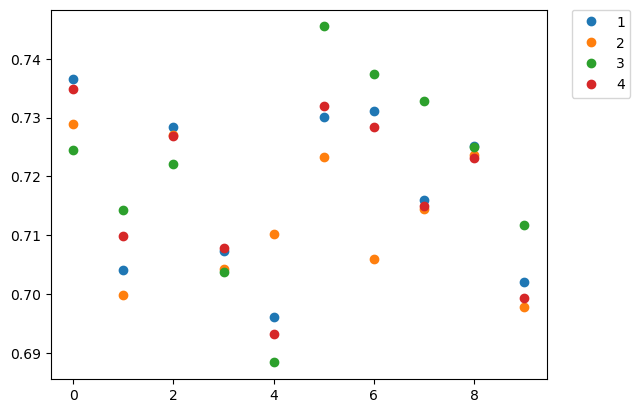

In [25]:
# Make a scatter plot of all the columns against the index
plt.plot(data_tray[0], linestyle='none', marker='o', label = '1')
plt.plot(data_tray[1], linestyle='none', marker='o', label = '2')
plt.plot(data_tray[2], linestyle='none', marker='o', label = '3')
plt.plot(data_tray[3], linestyle='none', marker='o', label = '4')
# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Within the samples the data seems random 

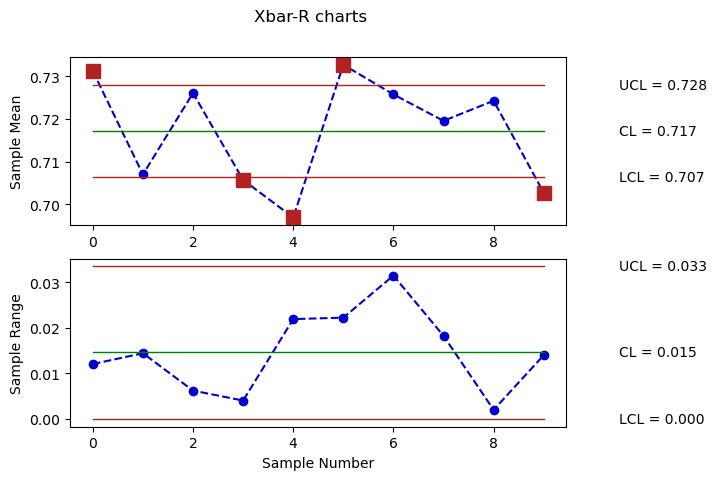

In [26]:
data_XR = qda.ControlCharts.XbarR(data_tray)

We obtain many alarms --> meandering pattern.  
The control limits of the Xbar chart look to narrow with respect to the natural variabilty of the statistic.   
This can be caused by a violation of assumptions (independence) within the sample. Thus, the Xbar-R control chart may be not approrpiate to monitor these data.  

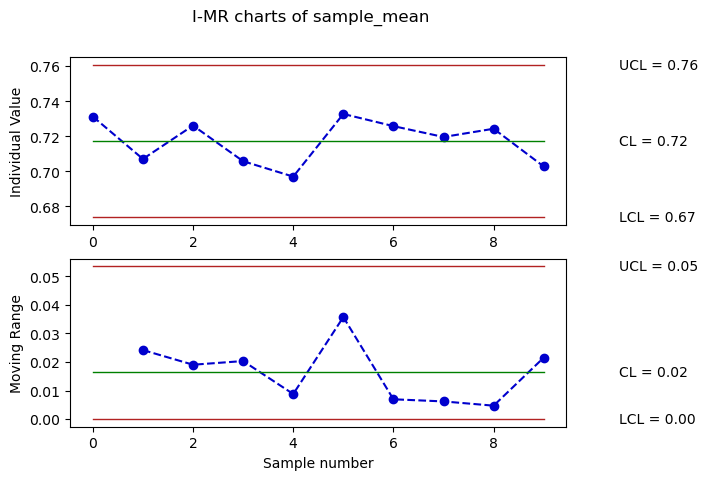

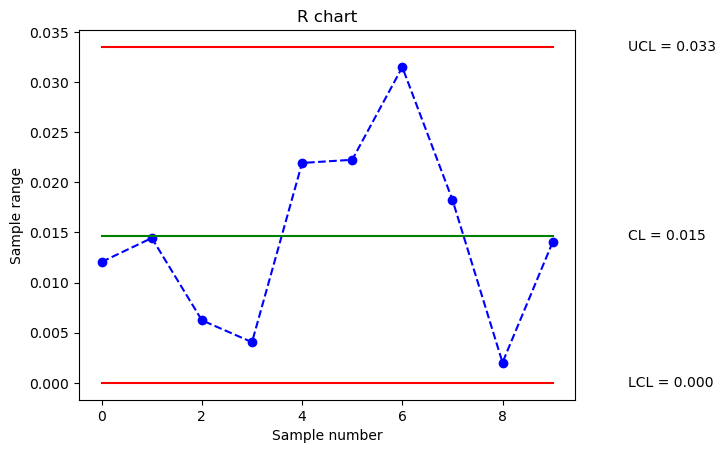

In [28]:
# Design a I-MR-R control chart

# Build the IMR chart using this new dataframe
data_Xbar = qda.ControlCharts.IMR(data_Xbar, 'sample_mean')

# Plot the R chart as well
plt.title('R chart')
plt.plot(data_XR['sample_range'], color='b', linestyle='--', marker='o')
plt.plot(data_XR['R_UCL'], color='r')
plt.plot(data_XR['R_CL'], color='g')
plt.plot(data_XR['R_LCL'], color='r')
plt.ylabel('Sample range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XR)+.5, data_XR['R_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XR['R_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_CL'].iloc[0], 'CL = {:.3f}'.format(data_XR['R_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XR['R_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XR['R_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()



## Using single objects

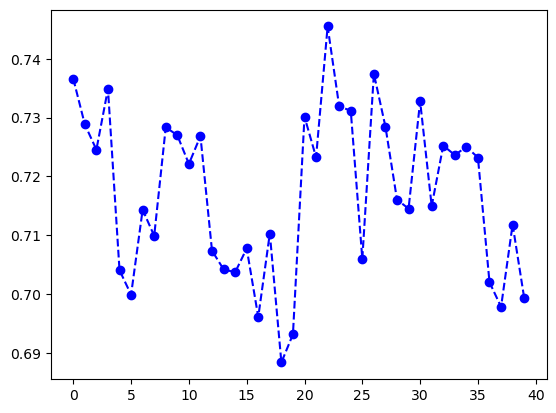

In [29]:
plt.plot(dataset['Wpixels_ratio'], color='b', linestyle='--', marker='o')

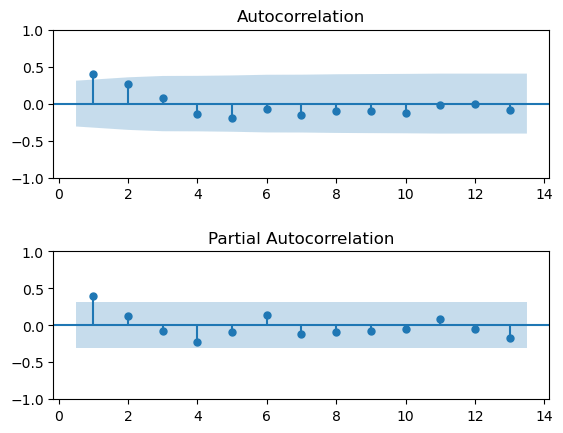

In [31]:
# meandering pattern

# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(dataset['Wpixels_ratio'], lags = int(len(dataset)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(dataset['Wpixels_ratio'], lags = int(len(dataset)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

We don't have iid data  --> Problem 

In [33]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(dataset['Wpixels_ratio'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.004


The process seem stationary but we don' have a real exp decay  --> try to model the trend  
The observations are not random 

In [50]:
# Fit a regression model to the data
import statsmodels.api as sm

dataset['1/t'] = 1/(np.arange(1, len(dataset)+1))

dataset.head()

# Fit the linear regression model
x = dataset['1/t']
x = sm.add_constant(x)
y = dataset['Wpixels_ratio']
model = sm.OLS(y,x).fit()

# Print the model summary
qda.summary(model)
### Not linear trend 

REGRESSION EQUATION
-------------------
Wpixels_ratio =  + 0.715 const + 0.021 1/t

COEFFICIENTS
------------
 Term   Coef  SE Coef  T-Value    P-Value
const 0.7149   0.0026 279.0215 1.5379e-64
  1/t 0.0213   0.0127   1.6750 1.0215e-01

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.0137 0.0688     0.0442

ANALYSIS OF VARIANCE
---------------------
    Source   DF  Adj SS  Adj MS    F-Value    P-Value
Regression  1.0  0.0005  0.0005     2.8055 1.0215e-01
     const  1.0 14.6700 14.6700 77853.0023 1.5379e-64
       1/t  1.0  0.0005  0.0005     2.8055 1.0215e-01
     Error 38.0  0.0072  0.0002        NaN        NaN
     Total 39.0  0.0077     NaN        NaN        NaN


Shapiro-Wilk test p-value on the residuals = 0.720


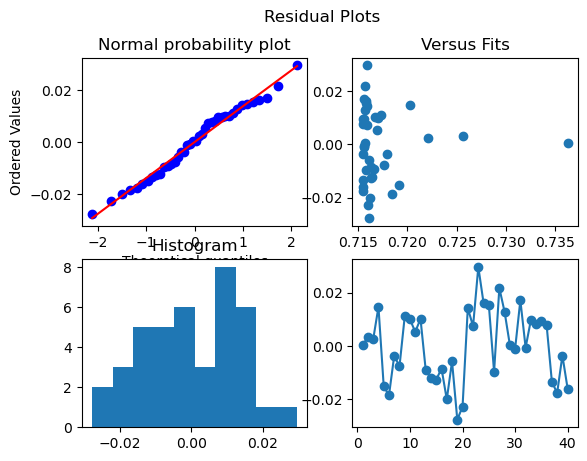

In [42]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model.fittedvalues, model.resid)
axs[0,1].set_title('Versus Fits')
axs[1,0].hist(model.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model.resid)+1), model.resid, 'o-')
_, pval_SW_res = stats.shapiro(model.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)

In [44]:
# ok the assumptions are satisfied ( the residuals are not so homosched..)

Runs test p-value on the residuals = 0.004


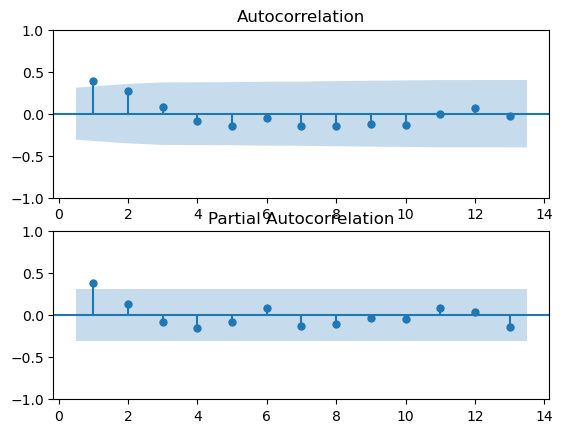

In [46]:
_, pval_runs_res = runstest_1samp(model.resid, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model.resid, lags = int(len(dataset)/3), zero=False, ax=ax[0])
sgt.plot_pacf(model.resid, lags = int(len(dataset)/3), zero=False, ax=ax[1], 
            method = 'ywm')
plt.show()

In [ ]:
df_res = pd.DataFrame({'I': model.resid})
df_res['MR'] = df_res['I'].diff().abs()

df_res.describe()

# CURVATURE  --> all the assumptions are satisfied 

In [52]:
m=10   #number of trays
n=4    #elements per tray
data_tray=np.array(dataset['Curvature Mean']).reshape(m,n)
data_tray=pd.DataFrame(data_tray)
data_tray.shape  # NB very few observations
data_tray.head()


,0,1,2,3
0,0.0064,0.0066,0.0067,0.0050
1,0.0064,0.0067,0.0057,0.0056
2,0.0055,0.0063,0.0069,0.0068
3,0.0060,0.0058,0.0064,0.0064
4,0.0063,0.0059,0.0055,0.0067


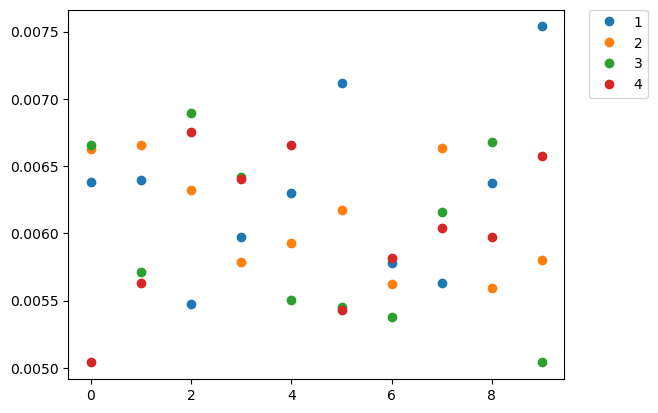

In [53]:
# Make a scatter plot of all the columns against the index
plt.plot(data_tray[0], linestyle='none', marker='o', label = '1')
plt.plot(data_tray[1], linestyle='none', marker='o', label = '2')
plt.plot(data_tray[2], linestyle='none', marker='o', label = '3')
plt.plot(data_tray[3], linestyle='none', marker='o', label = '4')
# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Within the samples the data seems random 

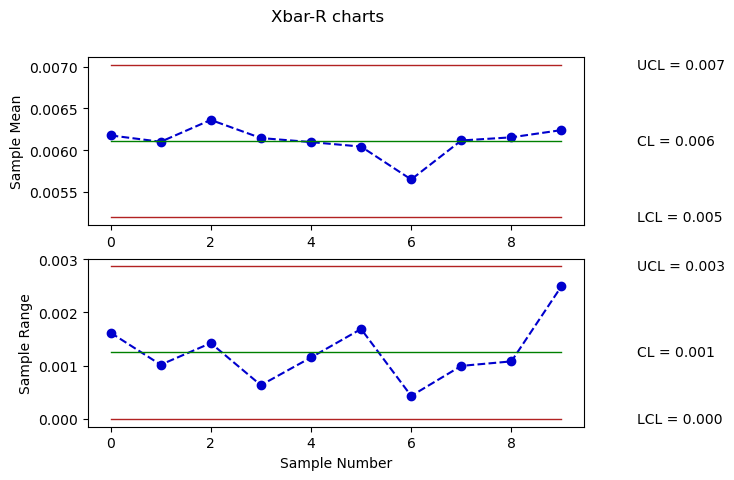

In [54]:
data_XR = qda.ControlCharts.XbarR(data_tray)

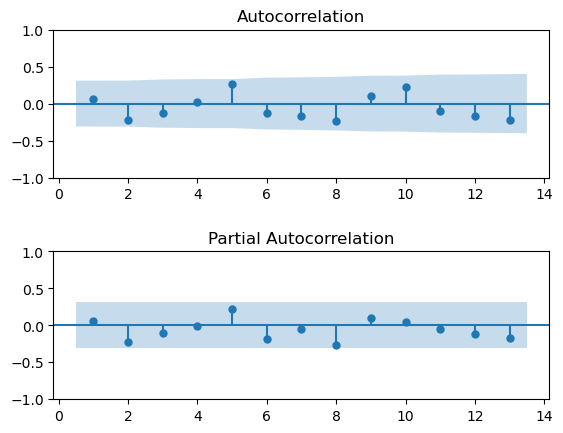

In [55]:
# meandering pattern

# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(dataset['Curvature Mean'], lags = int(len(dataset)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(dataset['Curvature Mean'], lags = int(len(dataset)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

In [56]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(dataset['Curvature Mean'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.522


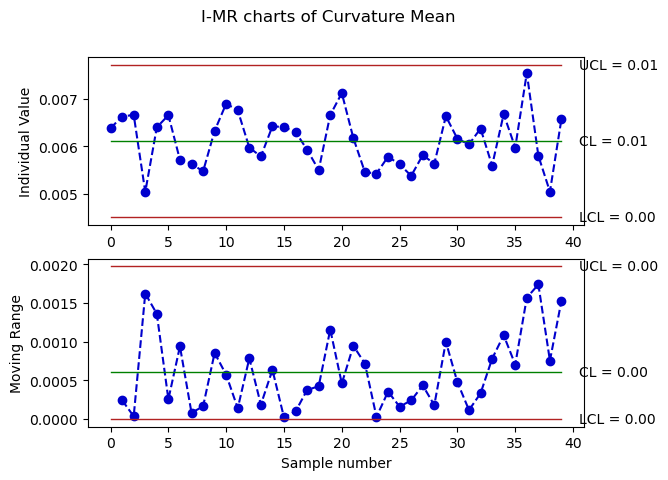

In [57]:
data_IMR = qda.ControlCharts.IMR(dataset, 'Curvature Mean')

# AREA  -> NO IID, but the pb are solved with SCC

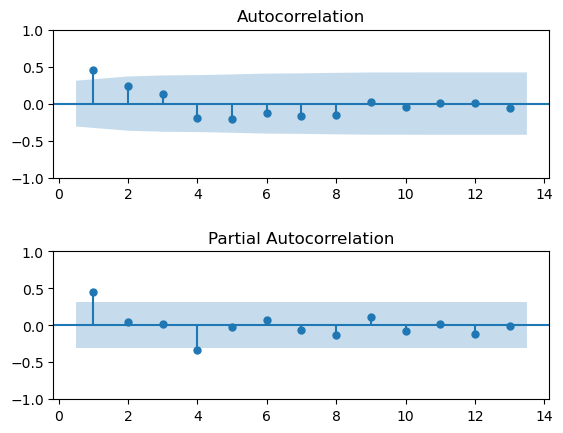

In [62]:
# meandering pattern

# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(dataset['Area [pixels]'], lags = int(len(dataset)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(dataset['Area [pixels]'], lags = int(len(dataset)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

In [64]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(dataset['Area [pixels]'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.025


In [69]:
# AR(1) MODEL

# Add a column with the lagged temperature to use as regressor
dataset['Area_lag1'] = dataset['Area [pixels]'].shift(1)

# Fit the linear regression model
import statsmodels.api as sm

x = dataset['Area_lag1'][1:]
x = sm.add_constant(x)
y = dataset['Area [pixels]'][1:]
model = sm.OLS(y, x).fit()
qda.summary(model)

REGRESSION EQUATION
-------------------
Area [pixels] =  + 19717.318 const + 0.469 Area_lag1

COEFFICIENTS
------------
     Term       Coef   SE Coef  T-Value  P-Value
    const 19717.3183 5367.5324   3.6734   0.0008
Area_lag1     0.4686    0.1442   3.2492   0.0025

MODEL SUMMARY
-------------
       S  R-sq  R-sq(adj)
712.1326 0.222      0.201

ANALYSIS OF VARIANCE
---------------------
    Source   DF     Adj SS     Adj MS  F-Value  P-Value
Regression  1.0 5.3540e+06 5.3540e+06  10.5575   0.0025
     const  1.0 6.8433e+06 6.8433e+06  13.4942   0.0008
 Area_lag1  1.0 5.3540e+06 5.3540e+06  10.5575   0.0025
     Error 37.0 1.8764e+07 5.0713e+05      NaN      NaN
     Total 38.0 2.4118e+07        NaN      NaN      NaN


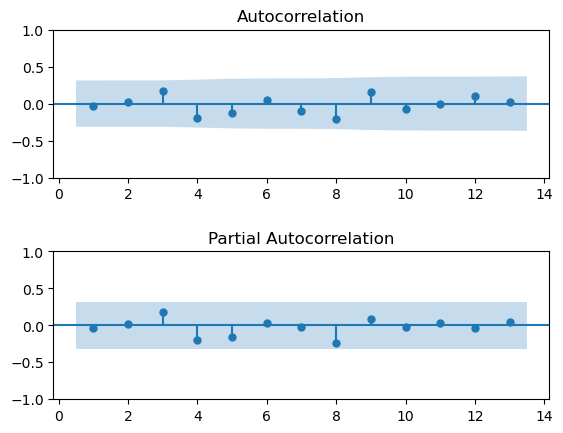

In [70]:
# Check the autocorrelation of the residuals
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model.resid, lags = int(len(dataset)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(model.resid, lags = int(len(dataset)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

In [71]:
_, pval_runs_resid = runstest_1samp(model.resid, correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs_resid))

# indipendence 

Runs test p-value = 0.254


Shapiro-Wilk test p-value on the residuals = 0.496


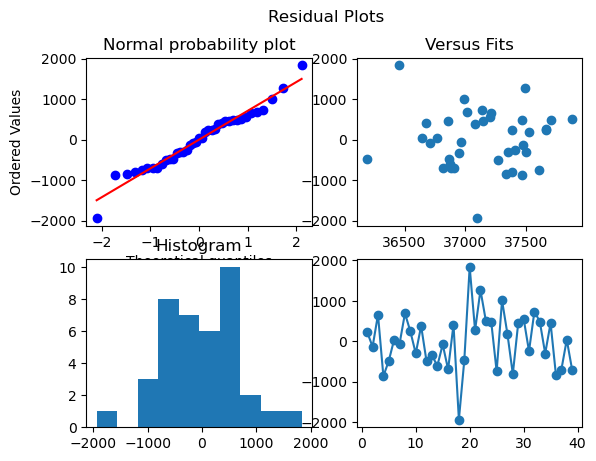

In [72]:
# Plot the residuals and test for normality
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model.fittedvalues, model.resid)
axs[0,1].set_title('Versus Fits')
axs[1,0].hist(model.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model.resid)+1), model.resid, 'o-')
_, pval_SW_res = stats.shapiro(model.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)

In [79]:
#SCC

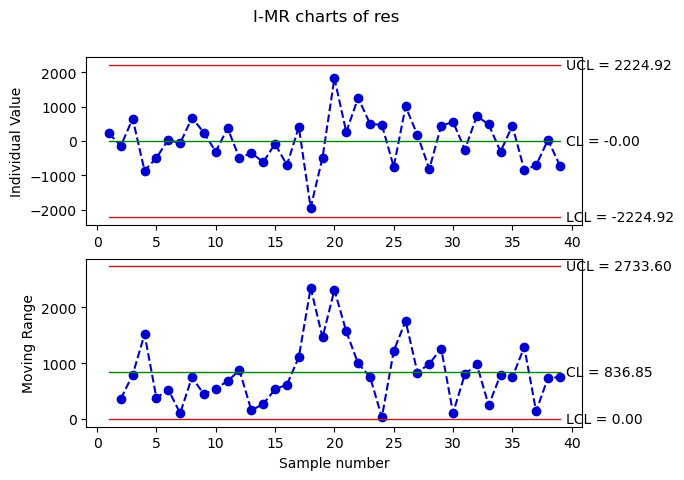

In [73]:
# Put the residuals in a dataframe
df_SCC = pd.DataFrame(model.resid, columns=['res'])

# Plot the IMR control chart
df_SCC_IMR = qda.ControlCharts.IMR(df_SCC, 'res')

In [78]:
# FVC

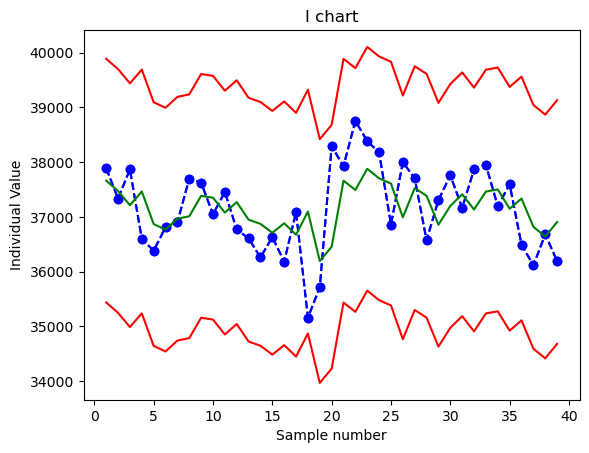

In [76]:
d2 = qda.constants.getd2(2)

MRbar_res = df_SCC_IMR['MR_CL'].iloc[0]

# Create a new dataframe with the original data and the center line (the fitted values)
df = pd.DataFrame({'I': dataset['Area [pixels]'].iloc[1:], 'I_CL': model.fittedvalues}, index=dataset.index[1:])

# Add the I_UCL and I_LCL columns with the upper and 
# lower control limits computed from the formula
df['I_UCL'] = df['I_CL'] + 3 * MRbar_res / d2
df['I_LCL'] = df['I_CL'] - 3 * MRbar_res / d2

# Add the TEST1 column
df['I_TEST1'] = np.where((df['I'] > df['I_UCL']) | (df['I'] < df['I_LCL']), df['I'], np.nan)

# Plot the I chart
plt.title('I chart')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I_UCL'], color='r')
plt.plot(df['I_CL'], color='g')
plt.plot(df['I_LCL'], color='r')
plt.ylabel('Individual Value')
plt.xlabel('Sample number')
# highlight the points that violate the alarm rules
plt.plot(df['I_TEST1'], linestyle='none', marker='s', 
        color='r', markersize=10)

plt.show()

In [77]:
# Nice fit